In [10]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#%matplotlib inline
%autosave 40
sns.set(color_codes=True)

Autosaving every 40 seconds


In [11]:
data_cate = pd.read_csv("./data_all_cate.csv")
data_cont = pd.read_csv("./data_cont.csv")
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")

variables = list(data_cate.columns)+list(data_cont.columns)

In [12]:
print(train.shape)

(1460, 81)


In [13]:
##### cate / cont #####
with open("./variable_ls/data_cate_num_dum_varname.lst", 'rb') as f:
    ord_var = pickle.load(f)
    ord_var = list(ord_var)
with open("./variable_ls/data_cate_dum_varname.lst", 'rb') as f:
    nom_var = pickle.load(f)
    nom_var = list(nom_var)
with open("./variable_ls/data_cont_varname.lst", 'rb') as f:
    cont_var = pickle.load(f)
    cont_var = list(cont_var)

In [14]:
print("ord_var: \n", len(ord_var))
print("nom_var: \n", len(nom_var))
print("cont_var: \n", len(cont_var))

ord_var: 
 23
nom_var: 
 173
cont_var: 
 35


In [15]:
##### y #####
SalePrice = train["SalePrice"]

In [16]:
##### imputation #####
import fancyimpute
from fancyimpute import KNN
import random
random.seed(123)
dt_KNN = KNN(k=3).fit_transform(data_cont)

Imputing row 1/2919 with 0 missing, elapsed time: 4.254
Imputing row 101/2919 with 1 missing, elapsed time: 4.257
Imputing row 201/2919 with 0 missing, elapsed time: 4.260
Imputing row 301/2919 with 0 missing, elapsed time: 4.262
Imputing row 401/2919 with 0 missing, elapsed time: 4.265
Imputing row 501/2919 with 0 missing, elapsed time: 4.267
Imputing row 601/2919 with 0 missing, elapsed time: 4.269
Imputing row 701/2919 with 0 missing, elapsed time: 4.272
Imputing row 801/2919 with 0 missing, elapsed time: 4.274
Imputing row 901/2919 with 1 missing, elapsed time: 4.276
Imputing row 1001/2919 with 0 missing, elapsed time: 4.279
Imputing row 1101/2919 with 0 missing, elapsed time: 4.282
Imputing row 1201/2919 with 0 missing, elapsed time: 4.284
Imputing row 1301/2919 with 1 missing, elapsed time: 4.287
Imputing row 1401/2919 with 0 missing, elapsed time: 4.290
Imputing row 1501/2919 with 1 missing, elapsed time: 4.292
Imputing row 1601/2919 with 0 missing, elapsed time: 4.294
Imputing 

In [18]:
dt_KNN = pd.DataFrame(dt_KNN)
dt_KNN.columns = data_cont.columns
print(dt_KNN.head(3))
print(dt_KNN.shape, data_cate.shape)

    Id  MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0  1.0        60.0         65.0   8450.0     2003.0        2003.0       196.0   
1  2.0        20.0         80.0   9600.0     1976.0        1976.0         0.0   
2  3.0        60.0         68.0  11250.0     2001.0        2002.0       162.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       706.0         0.0      150.0  ...       548.0         0.0   
1       978.0         0.0      284.0  ...       460.0       298.0   
2       486.0         0.0      434.0  ...       608.0         0.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0            0.0        0.0          0.0       0.0      0.0   
1          0.0            0.0        0.0          0.0       0.0      0.0   
2         42.0            0.0        0.0          0.0       0.0      0.0   

   MoSold  YrSold  
0     2.0  2008.0  
1     5.0  2007.0  
2     9.0  2008.0  

[3 rows x 35

In [19]:
##### split train & test #####
train_cont, test_cont = dt_KNN.iloc[0:train.shape[0], :], dt_KNN.iloc[train.shape[0]:, :]
train_cate, test_cate = data_cate.iloc[0:train.shape[0], :], data_cate.iloc[train.shape[0]:, :]

In [20]:
##### normalize #####
def nrmlize(x):
    xmean = np.mean(x)
    xmad=np.mean((x-xmean)**2)
    z = (x-xmean)/np.sqrt(xmad)
    return z

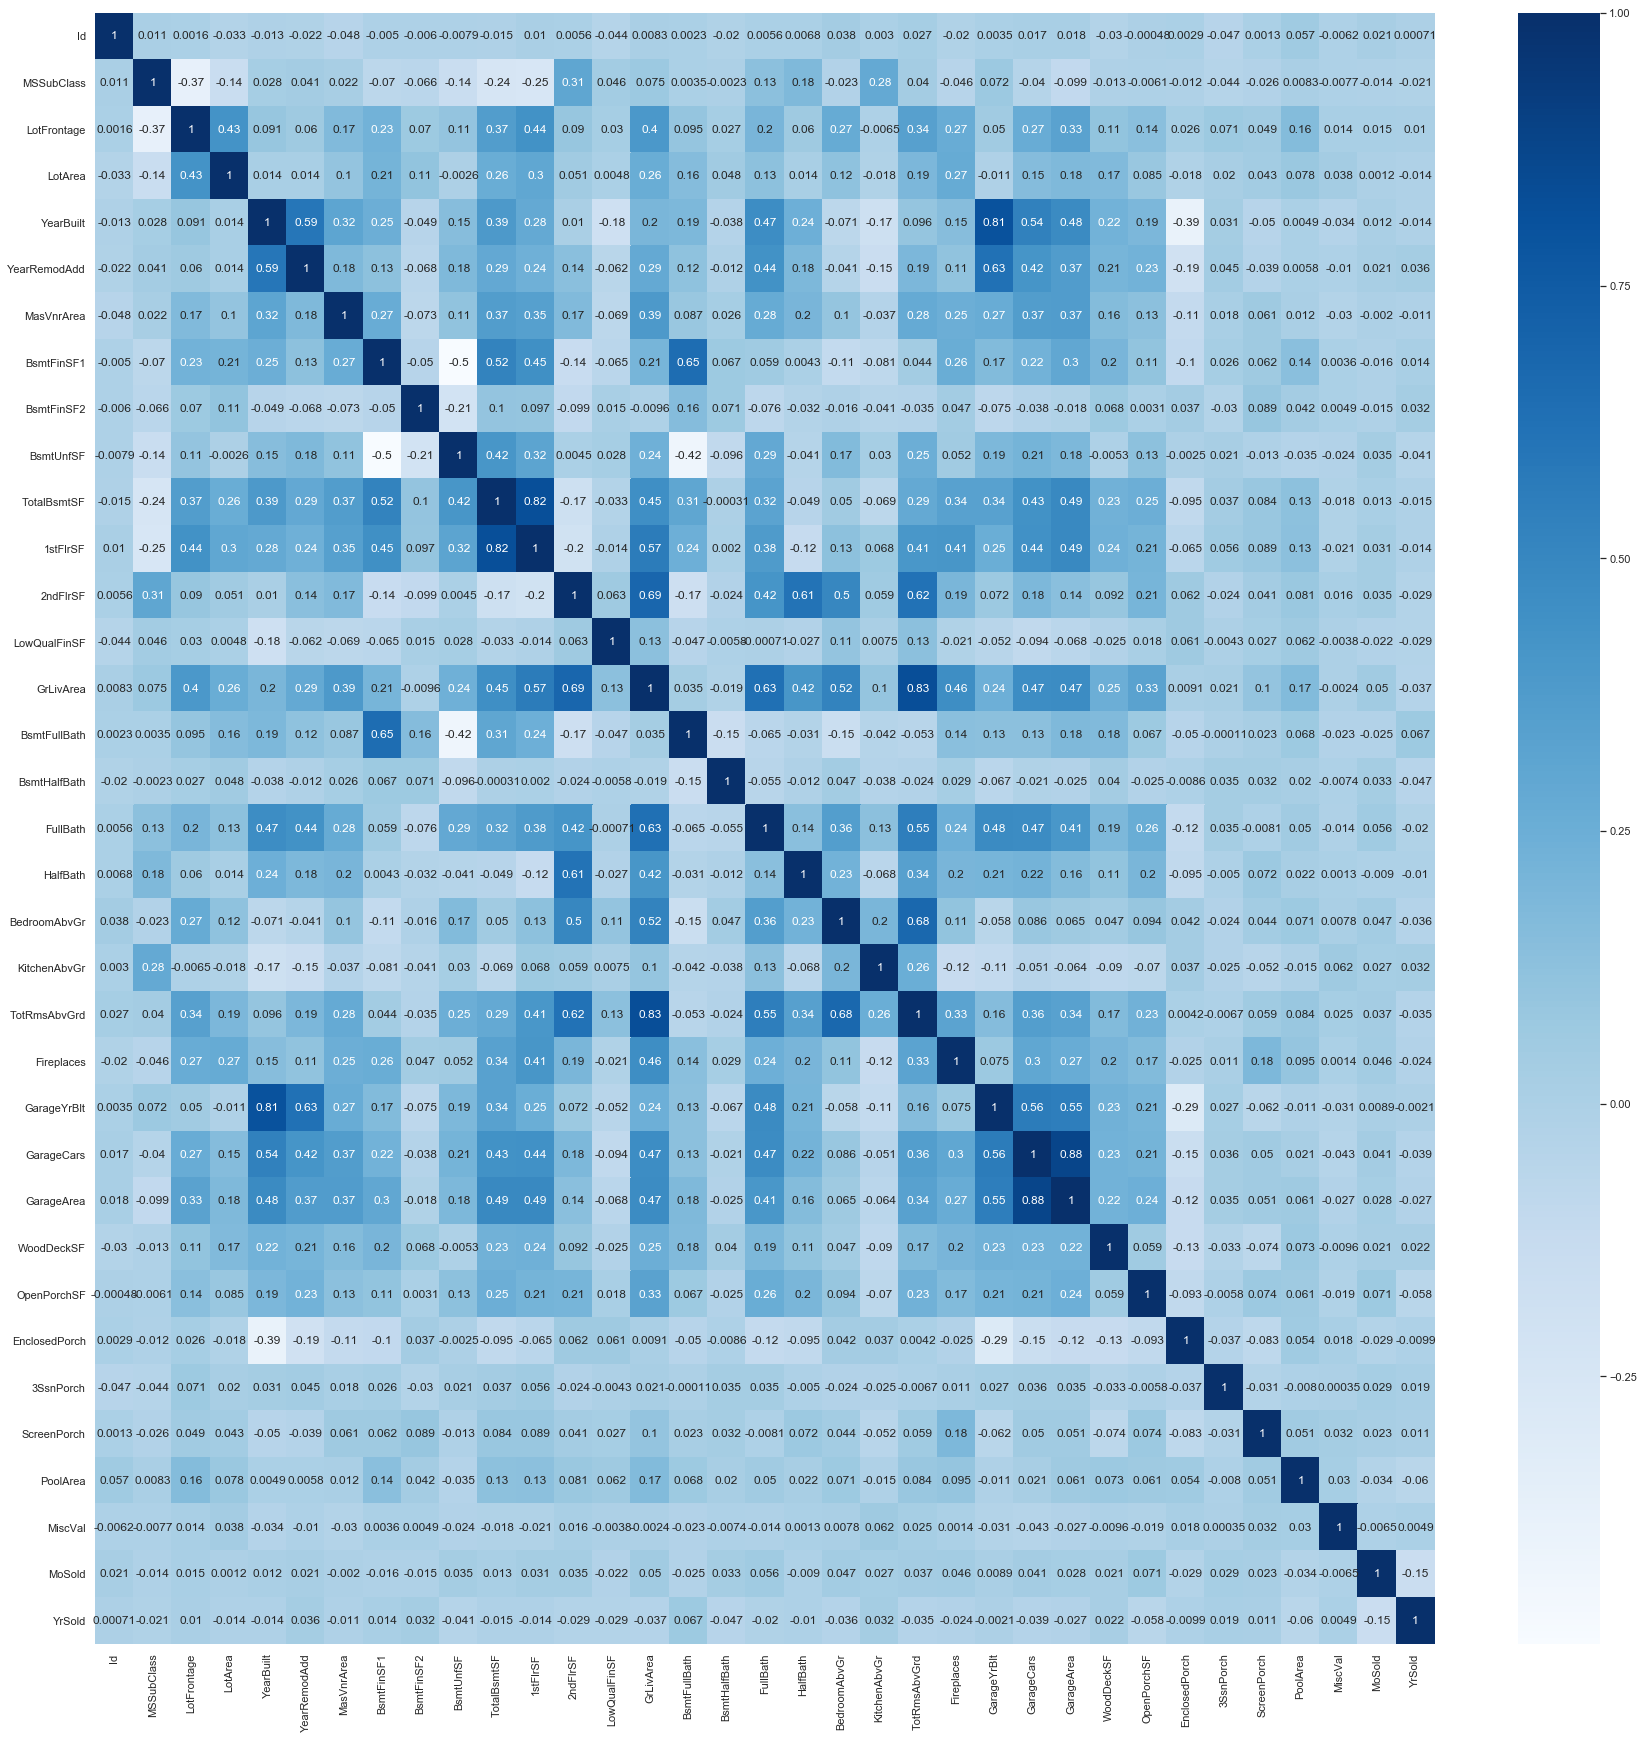

In [54]:
cor = nrmlize(train_cont).corr()
plt.figure(figsize=(30, 30))
sns.heatmap(cor, annot=True, cmap="Blues")
plt.savefig("./corrplot.png")

In [62]:
cor_ls = []
for i in cor.index:
    for j in cor.columns:
        if cor[i][j]>=0.5 and cor[i][j]!=1:
            print(i, j, cor[i][j])
            cor_ls.append(cor[i][j])
print(len(cor_ls))

YearBuilt YearRemodAdd 0.5928549763436523
YearBuilt GarageYrBlt 0.8063859616181825
YearBuilt GarageCars 0.5378500917111025
YearRemodAdd YearBuilt 0.5928549763436523
YearRemodAdd GarageYrBlt 0.6256303227638492
BsmtFinSF1 TotalBsmtSF 0.5223960519923888
BsmtFinSF1 BsmtFullBath 0.6492117535742571
TotalBsmtSF BsmtFinSF1 0.5223960519923888
TotalBsmtSF 1stFlrSF 0.8195299750050336
1stFlrSF TotalBsmtSF 0.8195299750050336
1stFlrSF GrLivArea 0.56602396893575
2ndFlrSF GrLivArea 0.6875010641666057
2ndFlrSF HalfBath 0.6097073002717462
2ndFlrSF BedroomAbvGr 0.502900613345914
2ndFlrSF TotRmsAbvGrd 0.6164226354915475
GrLivArea 1stFlrSF 0.56602396893575
GrLivArea 2ndFlrSF 0.6875010641666057
GrLivArea FullBath 0.6300116462511177
GrLivArea BedroomAbvGr 0.5212695109189959
GrLivArea TotRmsAbvGrd 0.8254893743088467
BsmtFullBath BsmtFinSF1 0.6492117535742571
FullBath GrLivArea 0.6300116462511177
FullBath TotRmsAbvGrd 0.5547842535334886
HalfBath 2ndFlrSF 0.6097073002717462
BedroomAbvGr 2ndFlrSF 0.5029006133459

In [45]:
##### PCA ######
def pcaProcess(data, num_pc, pic_nm):
    
    random.seed(123)
    
    pca = PCA(n_components = num_pc)
    pca.fit(nrmlize(data))
    loadings = pca.components_
    loadings = pd.DataFrame(loadings)
    idx = []
    
    explained_var = list(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100))    
    for i in range(len(explained_var)):
        explained_var[i] = ['{}th PC'.format(i+1), np.round(explained_var[i], decimals=3)]
        idx.append("{}th PC".format(i+1))
    
    loadings.index, loadings.columns = idx, cont_var
    loadings.to_csv("./{}.csv".format(pic_nm))
    
    plt.figure(figsize=(20, 20))
    sns.heatmap(loadings.T, annot=True, cmap="Blues")
    plt.savefig("{}_heatmap.png".format(pic_nm))
    
    explained_var = np.asarray(explained_var)
    explained_var = pd.DataFrame(explained_var)
    explained_var.index = explained_var.iloc[:, 0]
    explained_var.columns = ('PC', 'cumulative explained variance')
    explained_var = explained_var.drop('PC', axis=1)
    print(explained_var)
    
    plt.figure(figsize=(12, 9))
    plt.title(pic_nm)
    fig_pca = plt.plot(explained_var['cumulative explained variance'])
    plt.savefig("{}.png".format(pic_nm))
    
    data_pca = pca.fit_transform(nrmlize(data))
    data_pca = pd.DataFrame(data_pca)
    data_pca.columns = list(explained_var.index)
    
    return data_pca

        cumulative explained variance
0                                    
1th PC                           18.7
2th PC                           27.9
3th PC                           35.2
4th PC                           40.9
5th PC                           44.9
6th PC                           48.3
7th PC                           51.6
8th PC                           54.8
9th PC                           57.9
10th PC                          61.0
11th PC                          64.0
12th PC                          66.9
13th PC                          69.7
14th PC                          72.4
15th PC                          75.0
16th PC                          77.5
17th PC                          80.0
        cumulative explained variance
0                                    
1th PC                           19.4
2th PC                           28.7
3th PC                           36.1
4th PC                           41.9
5th PC                           47.5
6th PC      

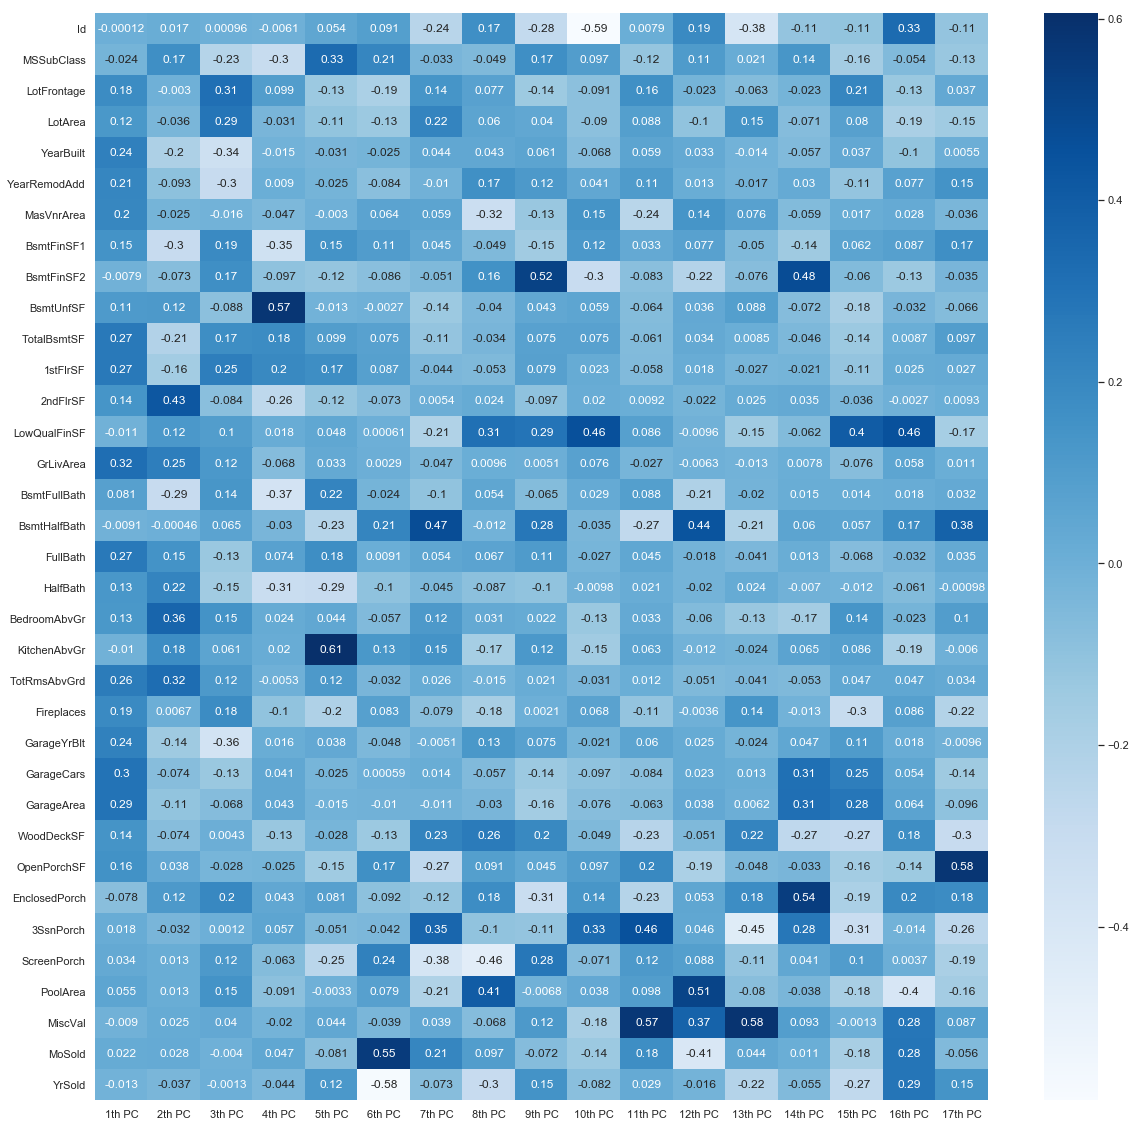

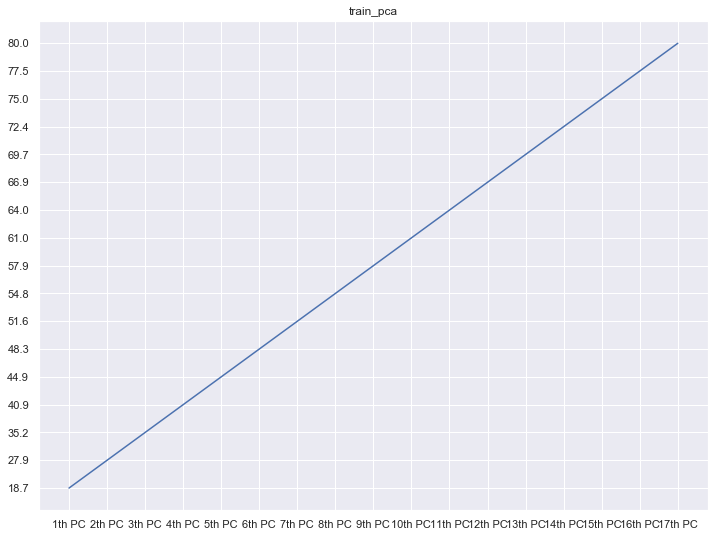

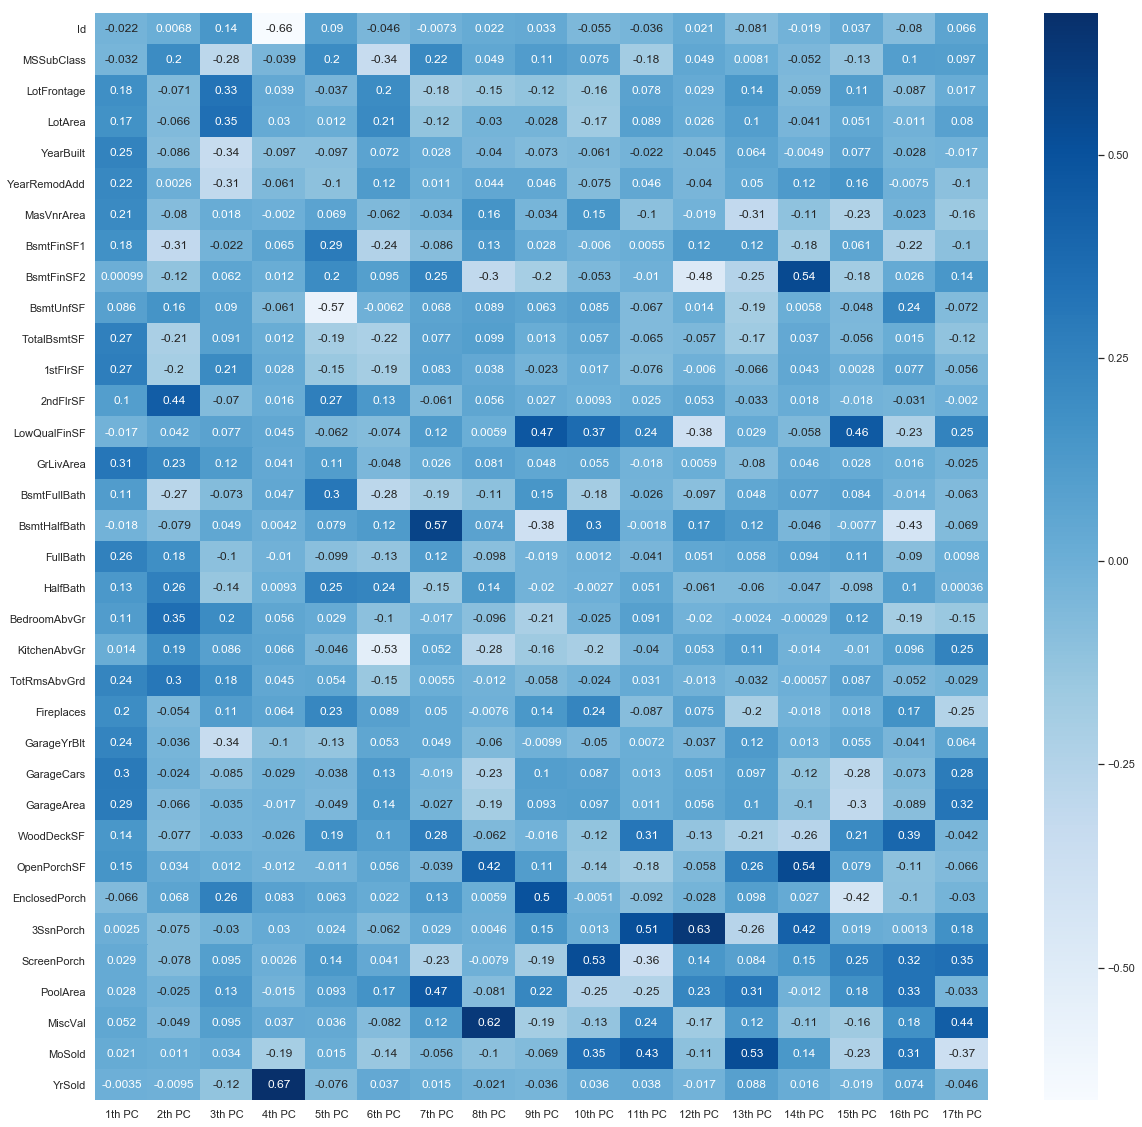

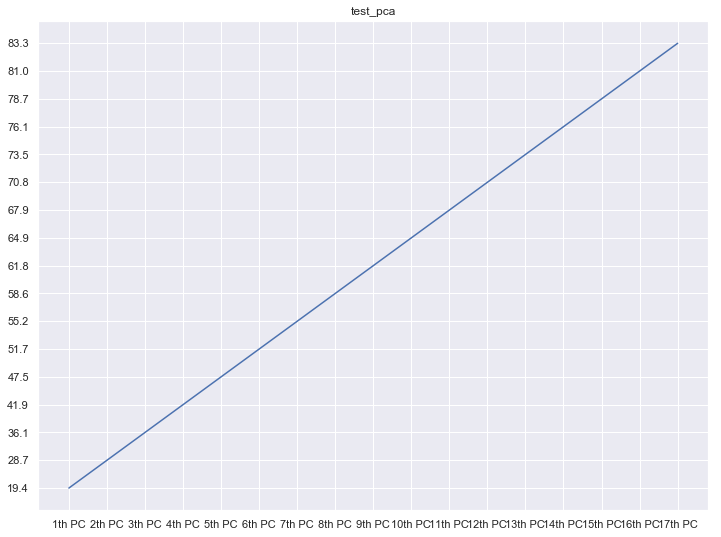

In [46]:
train_pca = pcaProcess(train_cont, 17, "train_pca")
test_pca = pcaProcess(test_cont, 17, "test_pca")
print(train_pca.head(5))
print(test_pca.head(5))
test_cate.reset_index(drop=True, inplace=True)

In [16]:
##### combine pca's data w/ categorical data #####
def CombineColumns(data_ls):
    dt = pd.concat(data_ls, axis=1)
    for i in range(len(dt.dtypes)):
        if i == len(dt.dtypes)-1:
            pass
        elif dt.dtypes[i] == 'int64':
            dt.iloc[:, i] = dt.iloc[:, i].astype('object')
    return dt

In [19]:
train_dt = CombineColumns([train_pca, train_cate])
test_dt = CombineColumns([test_pca, test_cate])

print(train_dt.head(3))
print(test_dt.head(3))

train_dt.to_csv("train_3NN_pca.csv", index=False)
test_dt.to_csv("test_3NN_pca.csv", index=False)

     0th PC    1th PC    2th PC    3th PC    4th PC    5th PC    6th PC  \
0  1.271017  0.359980 -1.739790 -1.915539  0.202576 -1.478983  0.050082   
1  0.211854 -1.245280  0.892212  0.202264 -0.986091  0.557684  3.156939   
2  1.458815  0.237084 -1.504299 -1.338475 -0.512015 -0.023681  0.438615   

     7th PC    8th PC    9th PC  ...  SaleCondition_Family  \
0 -0.298709 -0.066637  1.208679  ...                     0   
1  0.219808  1.550899  0.696856  ...                     0   
2 -0.285916 -0.209555  0.894843  ...                     0   

   SaleCondition_Normal  SaleCondition_Partial  MiscFeature_Gar2  \
0                     1                      0                 0   
1                     1                      0                 0   
2                     1                      0                 0   

   MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC MiscFeature_unknown  \
0                 0                 0                 0                   1   
1                 0